In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Statevector

In [18]:
from sqlite_mps import SQLITE_MPS

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from itertools import product


In [4]:
def svQiskitStyleToMine(sv : np.array):
    """
    Statevectors are np.arrays
    Converts the Qiskit statevector style to mine
    Returns:
        s : state vector My package style
    """
    # Qiskit: last..3rd,2nd,1st
    # Mine: 1st2nd3rd...last
    n = int(np.log2(len(sv)))
    newSv = [0 for _ in range(len(sv))]
    for s in range(len(sv)):
        b = bin(s)
        string = b[2:]
        for i in range(n-len(string)):
            string = "0" + string
        newS = string[::-1]
        newInt = eval('0b' + newS)
        newSv[s] = sv[newInt]
    # print(newSv)
    # print(sv)
    return np.array(newSv)

In [5]:
def plot_statevector(MPS: np.ndarray):
    MPS=MPS.flatten()
    n = int(np.log2(MPS.shape[0]))
    probs = np.abs(MPS).__pow__(2)

    x_lbls = ["".join(state) for state in product("01", repeat=n)]

    plt.bar(x_lbls, probs)
    plt.xlabel("Quantum States")
    plt.ylabel("Probability")
    plt.title("Probability Distribution of  Quantum States")
    plt.ylim(0, 1)
    plt.show()

In [6]:
def get_qiskit_statevector(qiskit_circ) -> Statevector:
        circ = qiskit_circ.copy().reverse_bits()
        circ.save_statevector()
        # Transpile for simulator
        simulator = AerSimulator(method="statevector")
        circ = transpile(circ, simulator)
        # Run and get statevector
        result = simulator.run(circ).result()
        statevector = result.get_statevector(circ)
        return statevector

In [7]:
def measure_qiskit_probablities(qiskit_circ):
        statevector = get_qiskit_statevector(qiskit_circ)
        probs = statevector.probabilities(decimals=5)
        return np.array(statevector)

[0.5145251 +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.85747532+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
(0,)    (0.5145250977855069+0j)
(1,)    0j
(2,)    0j
(3,)    0j
(4,)    (0.8574753196149815+0j)
(5,)    0j
(6,)    0j
(7,)    0j


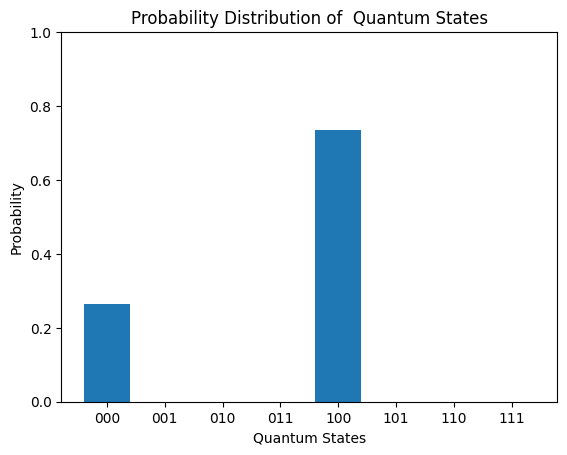

In [20]:
qiskit_circ = QuantumCircuit(3)
qiskit_circ.h(0)
qiskit_circ.ry(0.244444444,0)
qiskit_circ.ry(0.245444444,0)
res=measure_qiskit_probablities(qiskit_circ)
print(res)
for idx,x in np.ndenumerate(res):
    print(f"{idx}    {x}")
plot_statevector(res)

[0.+0.j         0.+0.j         0.-0.70710678j 0.+0.j
 0.+0.70710678j 0.+0.j         0.+0.j         0.+0.j        ]


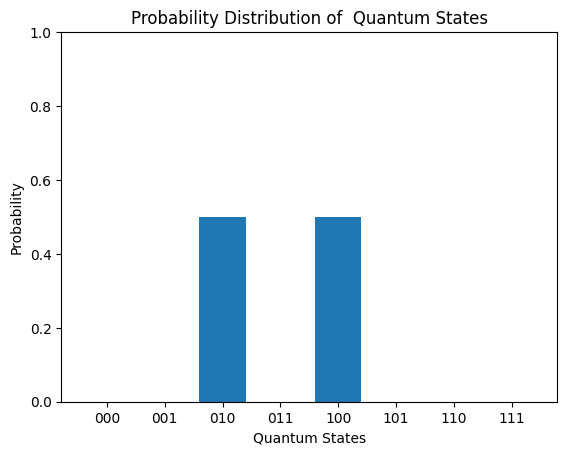

In [15]:
sim=SQLITE_MPS(3,{"H":None,"X":None,"Y":None,"T":None,"CNOT":None,"RY":{"0.244444444":0},"CY":None,"P":{"0.244444444":0}})
sim.apply_one_qbit_gate(0,"H")
sim.apply_two_qbit_gate(0,1,"CNOT")
sim.apply_one_qbit_gate(0,"Y")
print(sim.get_statevector_np())
plot_statevector(sim.get_statevector_np())

[ 0.        +0.j  0.        +0.j -0.16910198+0.j  0.        +0.j
  0.98559856+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
(0,)    0j
(1,)    0j
(2,)    (-0.16910198057424367+0j)
(3,)    0j
(4,)    (0.9855985593363391+0j)
(5,)    0j
(6,)    0j
(7,)    0j


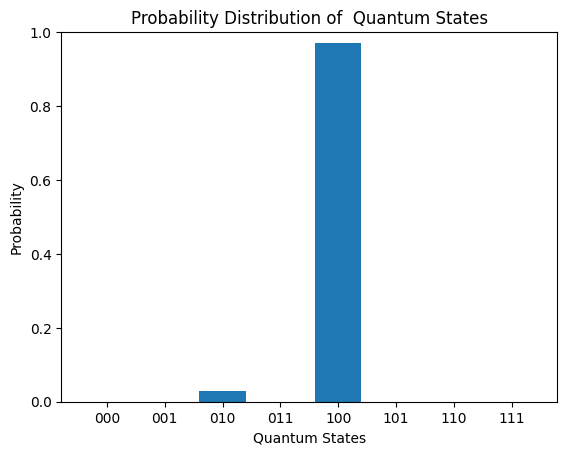

In [16]:
file=open("./circuits/w.json")
data=json.load(file)
t=SQLITE_MPS.run_circuit_json(data)
print(t.get_statevector_np())
for idx,x in np.ndenumerate(t.get_statevector_np()):
    print(f"{idx}    {x}")
plot_statevector(t.get_statevector_np())

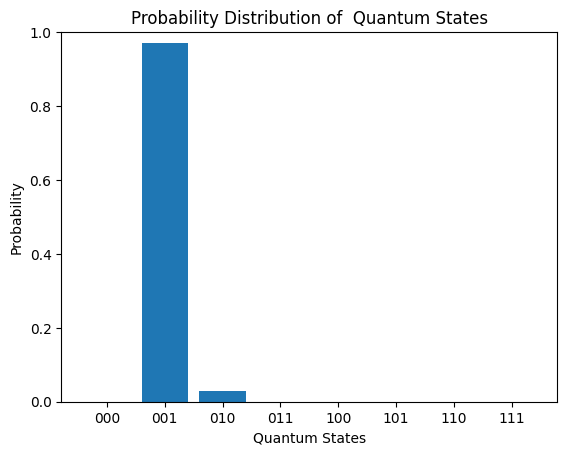

In [18]:
z=svQiskitStyleToMine(t.get_statevector_np())
plot_statevector(z)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
(0,)    (0.7071067811865476+0j)
(1,)    0j
(2,)    0j
(3,)    0j
(4,)    0j
(5,)    0j
(6,)    (0.7071067811865475+0j)
(7,)    0j


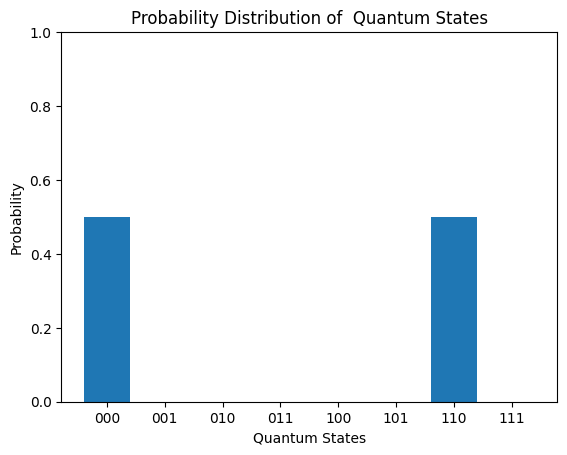

In [26]:
qiskit_circ = QuantumCircuit(3)
qiskit_circ.h(1)
qiskit_circ.cx(1,0)
res=measure_qiskit_probablities(qiskit_circ)
print(res)
for idx,x in np.ndenumerate(res):
    print(f"{idx}    {x}")
plot_statevector(res)